In [1]:
import numpy as np
from scipy import fftpack
import tensorly as tl 
import time
from tensorly.decomposition import tucker
import tensorsketch
from tensorsketch import util
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pickle 
import simulation
plt.style.use('seaborn-paper')
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

Using numpy backend.
Using numpy backend.


In [2]:
MARKER_LIST = ["s", "x", "o","+","*","d","^"]

In [3]:
def sim_name(gen_type,r,noise_level,dim, rm_typ): 
    """
    Obtain the file name to use for a given simulation setting
    """
    if noise_level == 0: 
        noise = "no"
    else: 
        noise = str(int(np.log10(noise_level)))
    return "data/typ"+gen_type+"_r"+str(r)+"_noise"+noise+"_dim"+str(dim)+ "_" + rm_typ

In [4]:
def find_rm_label(rm_typ): 
    if rm_typ == "g": 
        return "Gaussian"
    elif rm_typ == "u":
        return "Uniform"
    elif rm_typ == "sp0":
        return "Sparse"
    elif rm_typ == "gprod":
        return "Gaussian Khatri-Rao"
    elif rm_typ == "ssrft":
        return "SSRFT"

In [5]:
def find_gen_label(gen_typ): 
    if gen_typ == "id": 
        return "Superdiagonal"
    elif gen_typ == "lk":
        return "Low Rank"
    elif gen_typ == "fed":
        return "Fast Exponential Decay"
    elif gen_typ == "sed": 
        return "Slow Exponential Decay"
    elif gen_typ == "fpd": 
        return "Fast Polynomial Decay"
    elif gen_typ == "spd": 
        return "Slow Polynomial Decay"

In [6]:
def aistats_nssimlog(rm_typs,gen_type,r,noise_level,name,n, ns = [200,400,600], dim = 3, sim_runs = 1,random_seed = 1,fontsize = 18): 
    '''
    Plot the simulation results from run_nssim in the log scale. The plotted error is log(err(one or two pass)) - log(err(hooi)) 
    '''
    plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    plt.rc('text', usetex=True)
    sim_list = []
    plt.figure(figsize=(6,5))
    ymaxs = []
    for i,rm_typ in enumerate(rm_typs): 
        sim_list.append(pickle.load( open(sim_name(gen_type,r,noise_level,dim,rm_typ)+".pickle", "rb" ) ))
        plot_id = ns.index(n)
        if gen_type in ['id','lk']: 
            ks =np.arange(r, int(n/2),int(n/20)) 
        elif gen_type in ['spd','fpd']: 
            ks = np.arange(r,int(n/5),int(n/50))
        else: 
            ks = np.arange(r,int(n/10),int(n/100))
        two_pass_result = np.mean(sim_list[i][plot_id][0],0)  
        one_pass_result = np.mean(sim_list[i][plot_id][1],0)
        hosvd_result = np.mean(sim_list[i][plot_id][2],0) 
        two_pass_logratio = [np.log(two_pass_result[i]/hosvd_result[i]) for i in range(len(hosvd_result))]
        one_pass_logratio = [np.log(one_pass_result[i]/hosvd_result[i]) for i in range(len(hosvd_result))]
        plt.plot(ks/n, one_pass_logratio, label = find_rm_label(rm_typ), markersize = 10, marker = MARKER_LIST[i], markeredgewidth=1, markerfacecolor='None') 
        plt.title("I = %s"%(n))
        alldata = np.concatenate([two_pass_logratio,one_pass_logratio])
        ymaxs.append(max(alldata))
    #plt.title("$\gamma$ = %s"%(noise_level))
    plt.legend(loc = 'best')
    plt.xlabel('Compression Factor: $\delta_1$ = k/I')
    plt.ylabel('log(Relative Error)')
    plt.minorticks_off()
    alldata = np.concatenate([two_pass_logratio,one_pass_logratio])
    ymin = 0
    ymax = max(ymaxs)  
    def round_to_n(x,n): 
        if x == 0: 
            return 0
        else:
            return round(x,-int(np.floor(np.log10(abs(x))))+n-1) 
    ticks = [round_to_n(i,3) for i in np.arange(ymin, ymax+(ymax-ymin)/5,(ymax-ymin)/5)] 
    plt.yticks(ticks)
    plt.axes().title.set_fontsize(fontsize)
    plt.axes().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2e')) 
    plt.axes().xaxis.label.set_fontsize(fontsize)
    plt.axes().yaxis.label.set_fontsize(fontsize)
    plt.rc('legend',fontsize = fontsize)
    plt.rc('xtick', labelsize = fontsize) 
    plt.rc('ytick', labelsize = fontsize) 
    plt.tight_layout()
    plt.savefig('plots/aistats/'+name)
    plt.show()

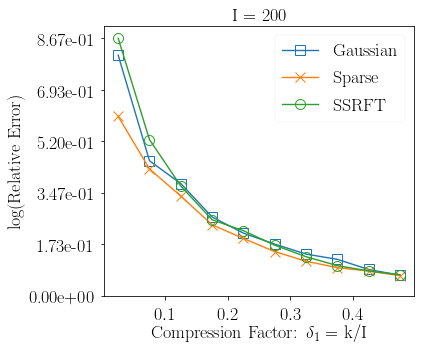

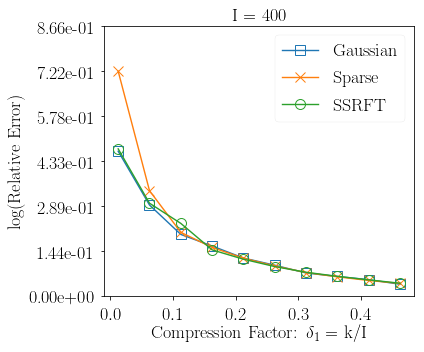

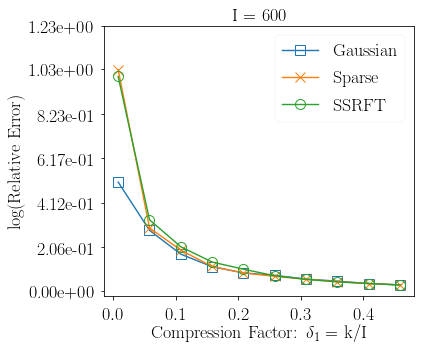

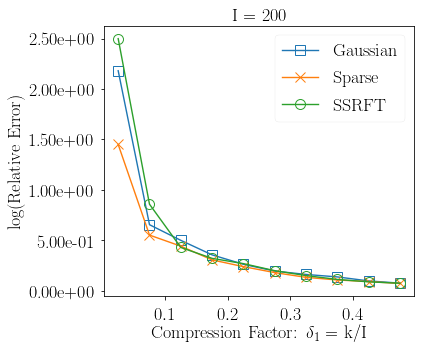

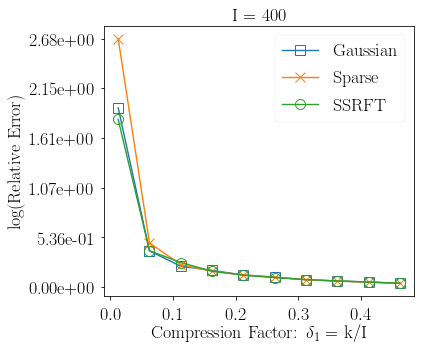

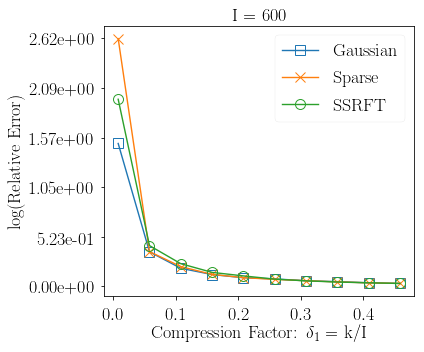

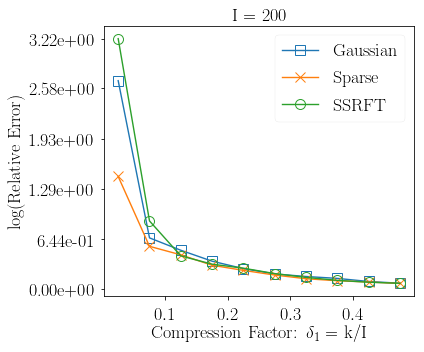

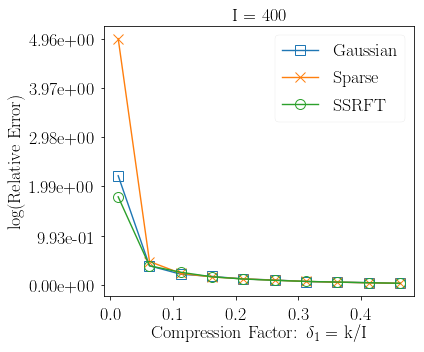

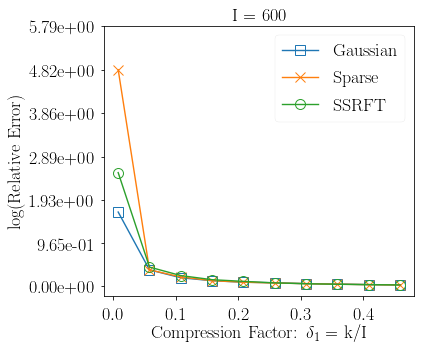

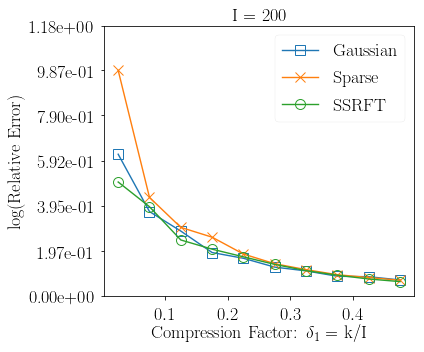

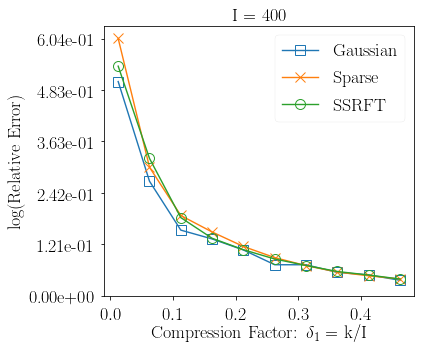

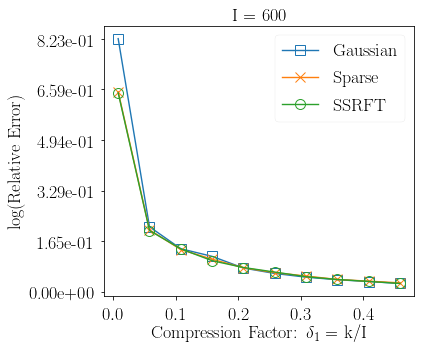

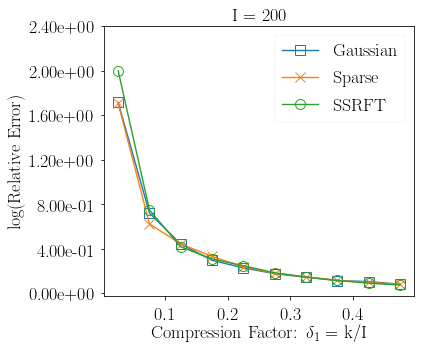

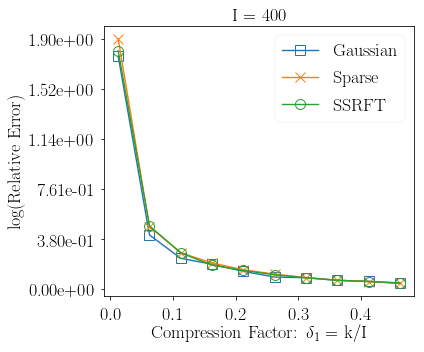

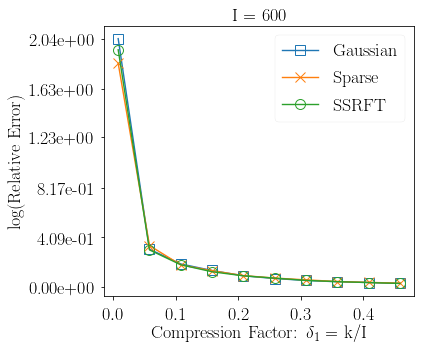

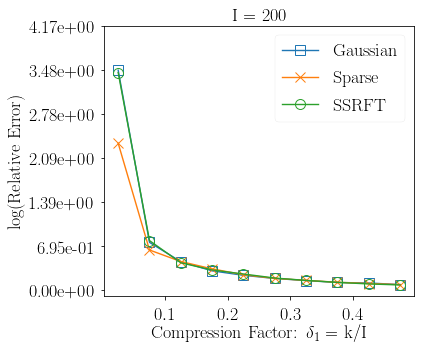

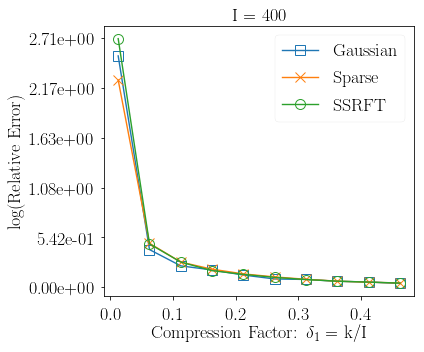

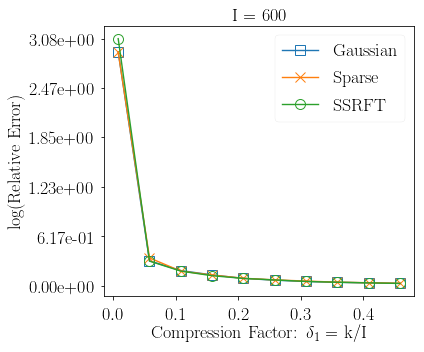

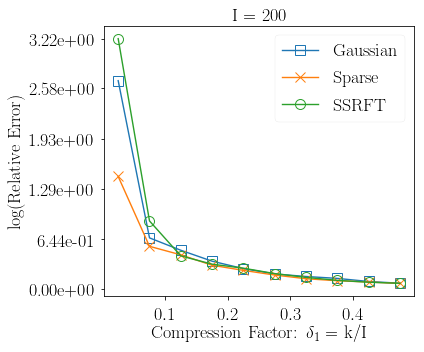

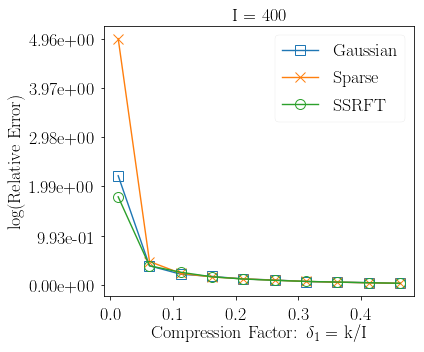

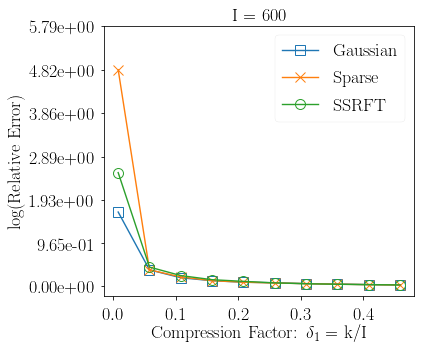

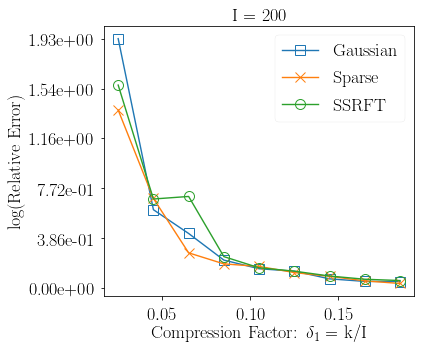

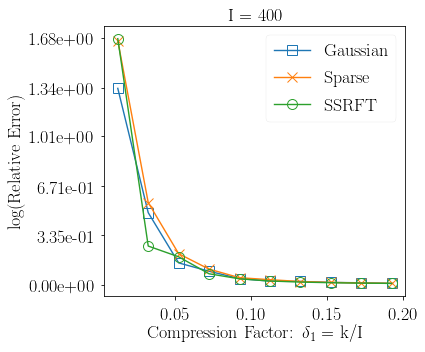

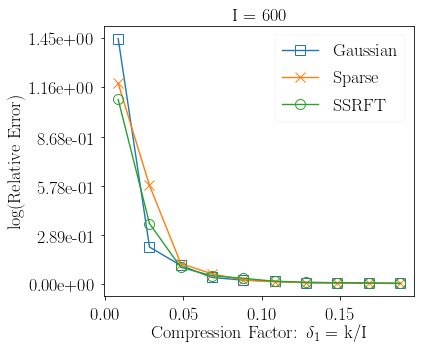

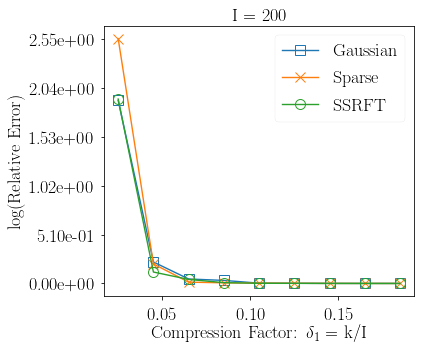

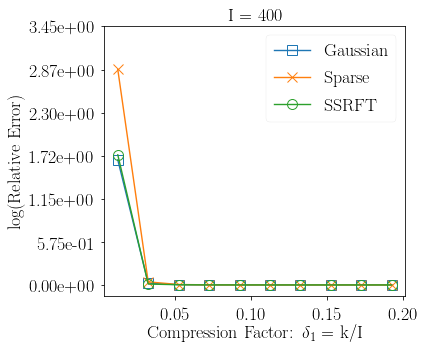

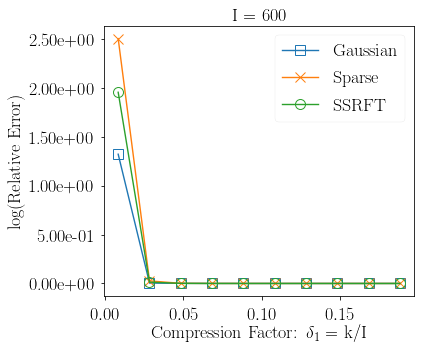

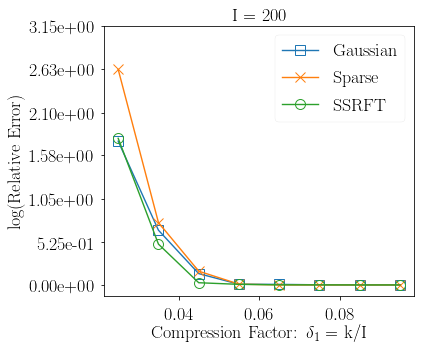

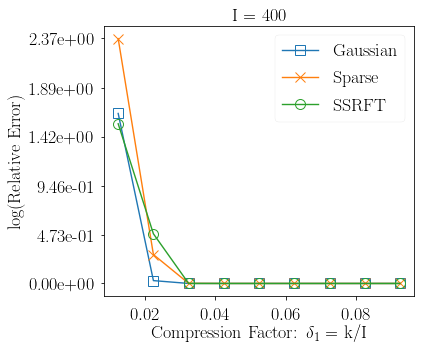

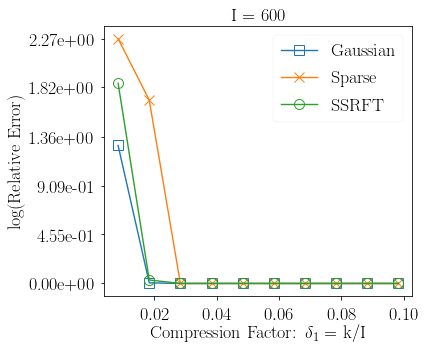

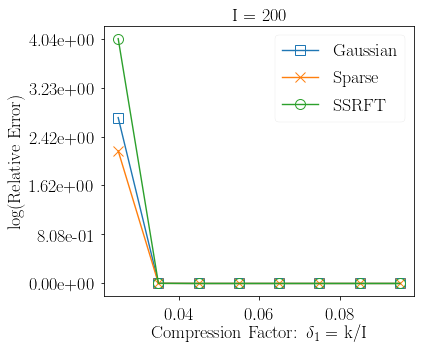

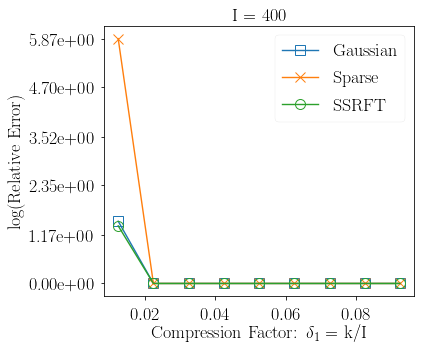

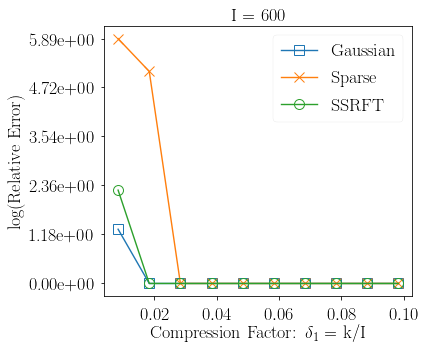

In [60]:
aistats_nssimlog(['g','sp0','ssrft'],'id',5,1,"multi_id_hnoise_n200log.pdf",200)
aistats_nssimlog(['g','sp0','ssrft'],'id',5,1,"multi_id_hnoise_n400log.pdf",400)
aistats_nssimlog(['g','sp0','ssrft'],'id',5,1,"multi_id_hnoise_n600log.pdf",600)
aistats_nssimlog(['g','sp0','ssrft'],'id',5,0.1,"multi_id_mnoise_n200log.pdf",200)
aistats_nssimlog(['g','sp0','ssrft'],'id',5,0.1,"multi_id_mnoise_n400log.pdf",400)
aistats_nssimlog(['g','sp0','ssrft'],'id',5,0.1,"multi_id_mnoise_n600log.pdf",600)
aistats_nssimlog(['g','sp0','ssrft'],'id',5,0.01,"multi_id_lnoise_n200log.pdf",200)
aistats_nssimlog(['g','sp0','ssrft'],'id',5,0.01,"multi_id_lnoise_n400log.pdf",400)
aistats_nssimlog(['g','sp0','ssrft'],'id',5,0.01,"multi_id_lnoise_n600log.pdf",600)
aistats_nssimlog(['g','sp0','ssrft'],'lk',5,1,"multi_lk_hnoise_n200log.pdf",200)
aistats_nssimlog(['g','sp0','ssrft'],'lk',5,1,"multi_lk_hnoise_n400log.pdf",400)
aistats_nssimlog(['g','sp0','ssrft'],'lk',5,1,"multi_lk_hnoise_n600log.pdf",600)
aistats_nssimlog(['g','sp0','ssrft'],'lk',5,0.1,"multi_lk_mnoise_n200log.pdf",200)
aistats_nssimlog(['g','sp0','ssrft'],'lk',5,0.1,"multi_lk_mnoise_n400log.pdf",400)
aistats_nssimlog(['g','sp0','ssrft'],'lk',5,0.1,"multi_lk_mnoise_n600log.pdf",600)
aistats_nssimlog(['g','sp0','ssrft'],'lk',5,0.01,"multi_lk_lnoise_n200log.pdf",200)
aistats_nssimlog(['g','sp0','ssrft'],'lk',5,0.01,"multi_lk_lnoise_n400log.pdf",400)
aistats_nssimlog(['g','sp0','ssrft'],'lk',5,0.01,"multi_lk_lnoise_n600log.pdf",600)
aistats_nssimlog(['g','sp0','ssrft'],'id',5,0.01,"multi_id_rk1_n200log.pdf",200)
aistats_nssimlog(['g','sp0','ssrft'],'id',5,0.01,"multi_id_rk1_n400log.pdf",400)
aistats_nssimlog(['g','sp0','ssrft'],'id',5,0.01,"multi_id_rk1_n600log.pdf",600)
aistats_nssimlog(['g','sp0','ssrft'],'spd',5,0.01,"multi_spd_n200log.pdf",200)
aistats_nssimlog(['g','sp0','ssrft'],'spd',5,0.01,"multi_spd_n400log.pdf",400)
aistats_nssimlog(['g','sp0','ssrft'],'spd',5,0.01,"multi_spd_n600log.pdf",600)
aistats_nssimlog(['g','sp0','ssrft'],'fpd',5,0.01,"multi_fpd_n200log.pdf",200)
aistats_nssimlog(['g','sp0','ssrft'],'fpd',5,0.01,"multi_fpd_n400log.pdf",400)
aistats_nssimlog(['g','sp0','ssrft'],'fpd',5,0.01,"multi_fpd_n600log.pdf",600)
aistats_nssimlog(['g','sp0','ssrft'],'sed',5,0.01,"multi_sed_n200log.pdf",200)
aistats_nssimlog(['g','sp0','ssrft'],'sed',5,0.01,"multi_sed_n400log.pdf",400)
aistats_nssimlog(['g','sp0','ssrft'],'sed',5,0.01,"multi_sed_n600log.pdf",600)
aistats_nssimlog(['g','sp0','ssrft'],'fed',5,0.01,"multi_fed_n200log.pdf",200)
aistats_nssimlog(['g','sp0','ssrft'],'fed',5,0.01,"multi_fed_n400log.pdf",400)
aistats_nssimlog(['g','sp0','ssrft'],'fed',5,0.01,"multi_fed_n600log.pdf",600)

In [8]:
def aistats_main_nssimlog(rm_typs,gen_type,r,noise_level,name,n, ns = [200,400,600], dim = 3, sim_runs = 1,random_seed = 1,fontsize = 18, title = ""): 
    '''
    Plot the simulation results from run_nssim in the log scale. The plotted error is log(err(one or two pass)) - log(err(hooi)) 
    '''
    plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    plt.rc('text', usetex=True)
    sim_list = []
    plt.figure(figsize=(6,5))
    ymaxs = []
    for i,rm_typ in enumerate(rm_typs): 
        sim_list.append(pickle.load( open(sim_name(gen_type,r,noise_level,dim,rm_typ)+".pickle", "rb" ) ))
        plot_id = ns.index(n)
        if gen_type in ['id','lk']: 
            ks =np.arange(r, int(n/2),int(n/20)) 
        elif gen_type in ['spd','fpd']: 
            ks = np.arange(r,int(n/5),int(n/50))
        else: 
            ks = np.arange(r,int(n/10),int(n/100))
        two_pass_result = np.mean(sim_list[i][plot_id][0],0)  
        one_pass_result = np.mean(sim_list[i][plot_id][1],0)
        hosvd_result = np.mean(sim_list[i][plot_id][2],0) 
        two_pass_logratio = [np.log(two_pass_result[i]/hosvd_result[i]) for i in range(len(hosvd_result))]
        one_pass_logratio = [np.log(one_pass_result[i]/hosvd_result[i]) for i in range(len(hosvd_result))]
        plt.plot(ks/n, one_pass_logratio, label = find_rm_label(rm_typ), markersize = 10, marker = MARKER_LIST[i], markeredgewidth=1, markerfacecolor='None') 
        alldata = np.concatenate([two_pass_logratio,one_pass_logratio])
        ymaxs.append(max(alldata))
    if title == "":
        plt.title(find_gen_label(gen_type))
    else: 
        plt.title(title)
    #plt.title("$\gamma$ = %s"%(noise_level))
    plt.legend(loc = 'best')
    plt.xlabel('Compression Factor: $\delta_1$ = k/I')
    plt.ylabel('log(Relative Error)')
    plt.minorticks_off()
    alldata = np.concatenate([two_pass_logratio,one_pass_logratio])
    ymin = 0
    ymax = max(ymaxs)  
    def round_to_n(x,n): 
        if x == 0: 
            return 0
        else:
            return round(x,-int(np.floor(np.log10(abs(x))))+n-1) 
    ticks = [round_to_n(i,3) for i in np.arange(ymin, ymax+(ymax-ymin)/5,(ymax-ymin)/5)] 
    plt.yticks(ticks)
    plt.axes().title.set_fontsize(fontsize)
    plt.axes().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2e')) 
    plt.axes().xaxis.label.set_fontsize(fontsize)
    plt.axes().yaxis.label.set_fontsize(fontsize)
    plt.rc('legend',fontsize = fontsize)
    plt.rc('xtick', labelsize = fontsize) 
    plt.rc('ytick', labelsize = fontsize) 
    plt.tight_layout()
    plt.savefig('plots/aistats/'+name)
    plt.show()

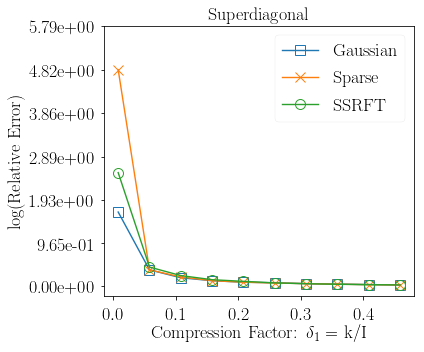

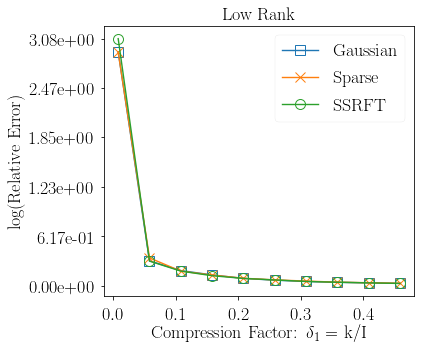

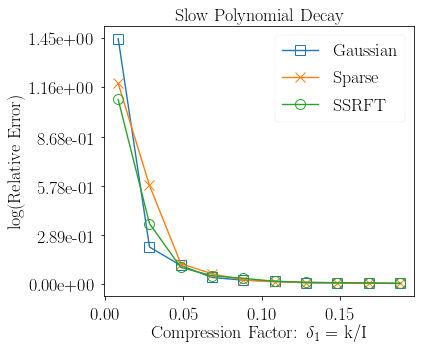

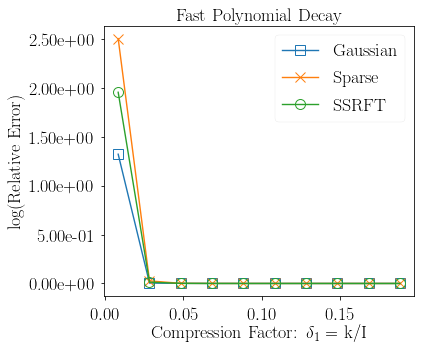

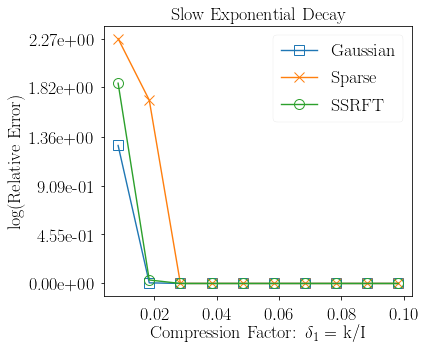

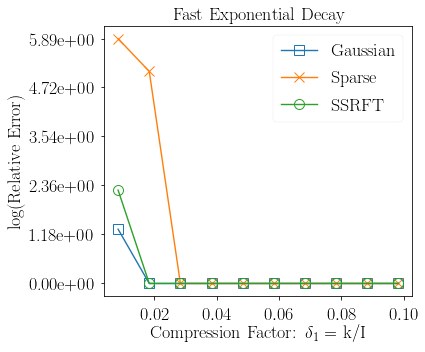

In [78]:
aistats_main_nssimlog(['g','sp0','ssrft'],'id',5,0.01,"main_id_n600log.pdf",600)
aistats_main_nssimlog(['g','sp0','ssrft'],'lk',5,0.01,"main_lk_n600log.pdf",600)
aistats_main_nssimlog(['g','sp0','ssrft'],'spd',5,0.01,"main_spd_n600log.pdf",600)
aistats_main_nssimlog(['g','sp0','ssrft'],'fpd',5,0.01,"main_fpd_n600log.pdf",600)
aistats_main_nssimlog(['g','sp0','ssrft'],'sed',5,0.01,"main_sed_n600log.pdf",600)
aistats_main_nssimlog(['g','sp0','ssrft'],'fed',5,0.01,"main_fed_n600log.pdf",600)

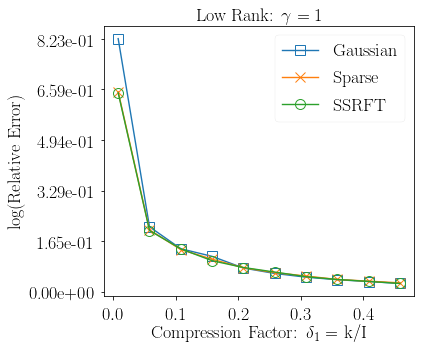

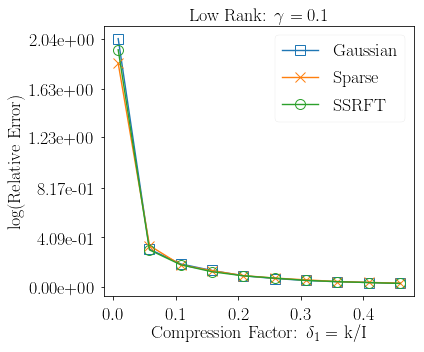

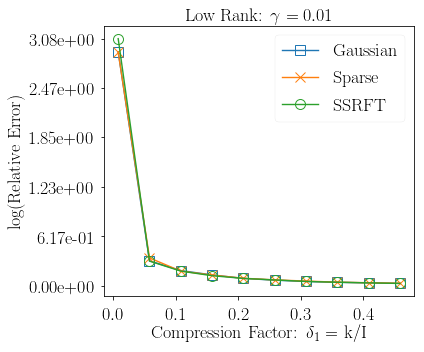

In [10]:
aistats_main_nssimlog(['g','sp0','ssrft'],'lk',5,1,"main_lk_hnoise_n600log.pdf",600, title = "Low Rank: $\gamma = 1$")
aistats_main_nssimlog(['g','sp0','ssrft'],'lk',5,0.1,"main_lk_mnoise_n600log.pdf",600, title = "Low Rank: $\gamma = 0.1$")
aistats_main_nssimlog(['g','sp0','ssrft'],'lk',5,0.01,"main_lk_lnoise_n600log.pdf",600, title = "Low Rank: $\gamma = 0.01$")

In [61]:
def aistats_nssim_fk(rm_typs,gen_type,r0,noise_level, n, name, title, dim = 3,random_seed = 1,fontsize = 18): 
    '''
    Plot the simulation results from run_nssim in the log scale. The plotted error is log(err(one or two pass)) - log(err(hooi)) 
    '''
    plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    plt.rc('text', usetex=True)
    sim_list = []
    plt.figure(figsize=(6,5))
    ymaxs = []
    ymins = [] 
    for i,rm_typ in enumerate(rm_typs): 
        sim_list.append(pickle.load( open(sim_name(gen_type,r0,noise_level,dim, rm_typ) +"_n"+str(n)+"fk.pickle", "rb" )))
        k = int(n*1/3)  
        s = 2*k+1
        rs = np.arange(int(r0/2),int(n/10),int(n/200))
        rratios = rs/n
        two_pass_result = [np.log(sim_list[i][0][j]/sim_list[i][2][j]) for j in range(len(sim_list[i][2]))]
        one_pass_result = [np.log(sim_list[i][1][j]/sim_list[i][2][j]) for j in range(len(sim_list[i][2]))]

        plt.plot(rratios,one_pass_result, label = find_label(rm_typ) ,markersize = 10, marker = MARKER_LIST[i] ,markeredgewidth=1,markerfacecolor='None') 
        alldata = np.concatenate([one_pass_result,two_pass_result])
        ymaxs.append(max(alldata))
        ymins.append(min(alldata))
    plt.legend(loc = 'best')
    plt.title(title)
    plt.xlabel('Relative Rank: $rk/I$')
    plt.ylabel('log(Relative Error)')
    plt.minorticks_off()
    ymin = min(ymins)
    ymax = max(ymaxs)  
    def round_to_n(x,n): 
        if x == 0: 
            return 0
        else: 
            return round(x,-int(np.floor(np.log10(abs(x))))+n-1) 
    ticks = [round_to_n(i,3) for i in np.arange(ymin, ymax+(ymax-ymin)/5,(ymax-ymin)/5)] 
    plt.yticks(ticks)
    plt.axes().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2e')) 
    plt.axes().xaxis.set_major_locator(ticker.MaxNLocator(10))
    plt.axes().title.set_fontsize(fontsize)
    plt.axes().xaxis.label.set_fontsize(fontsize)
    plt.axes().yaxis.label.set_fontsize(fontsize)
    plt.axhline(0, color='black',linewidth = 1)
    plt.rc('legend',fontsize = fontsize)
    plt.rc('xtick', labelsize = fontsize) 
    plt.rc('ytick', labelsize = fontsize) 
    plt.tight_layout()
    plt.savefig("plots/aistats/"+"multi_"+name+".pdf")
    plt.show()

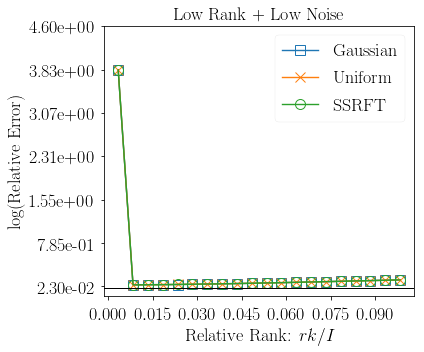

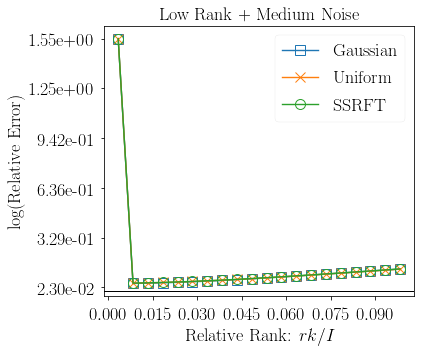

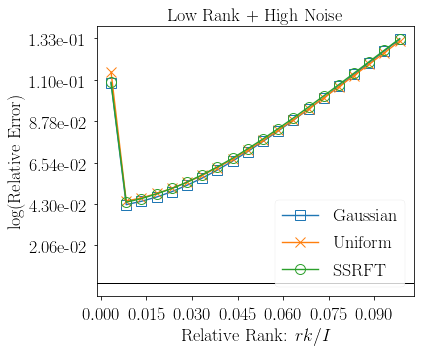

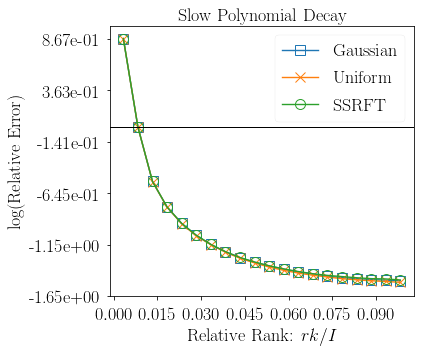

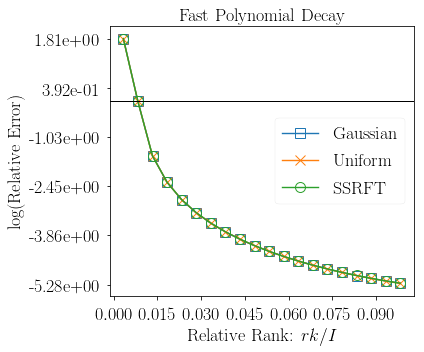

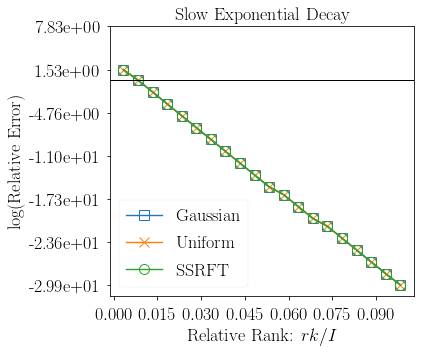

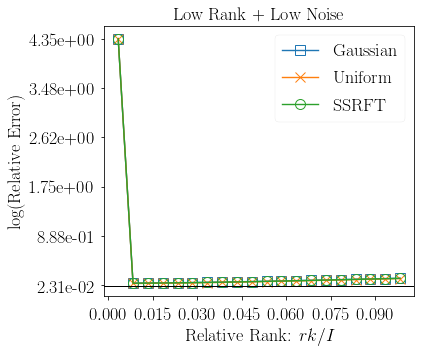

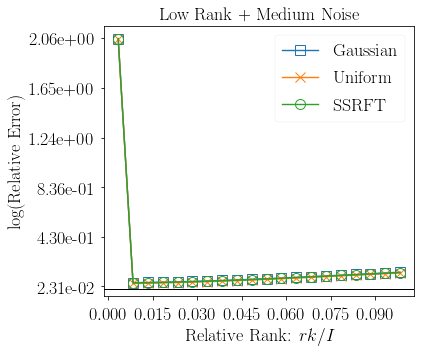

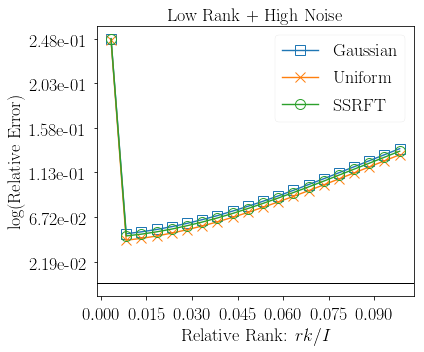

In [62]:
aistats_nssim_fk(['g','u','ssrft'],'lk',5,0.01,600,'lk_lnoise_n600fk', "Low Rank + Low Noise")
aistats_nssim_fk(['g','u','ssrft'],'lk',5,0.1,600,'lk_mnoise_n600fk', "Low Rank + Medium Noise")
aistats_nssim_fk(['g','u','ssrft'],'lk',5,1,600,'lk_hnoise_n600fk', "Low Rank + High Noise ")
aistats_nssim_fk(['g','u','ssrft'],'spd',5,0.01,600,'spd_n600fk','Slow Polynomial Decay')
aistats_nssim_fk(['g','u','ssrft'],'fpd',5,0.01,600, 'fpd_n600fk','Fast Polynomial Decay')
aistats_nssim_fk(['g','u','ssrft'],'sed',5,0.01,600, 'sed_n600fk','Slow Exponential Decay')
aistats_nssim_fk(['g','u','ssrft'],'id',5,0.01,600,'id_lnoise_n600fk', "Low Rank + Low Noise")
aistats_nssim_fk(['g','u','ssrft'],'id',5,0.1,600,'id_mnoise_n600fk', "Low Rank + Medium Noise")
aistats_nssim_fk(['g','u','ssrft'],'id',5,1,600,'id_hnoise_n600fk', "Low Rank + High Noise ")